In [28]:
from pyannote.core import Segment, Annotation as BaseAnnotation
from ciaev.metrics.metrics_controller import compute_metrics

In [29]:
# Annotation .pyi
class Annotation(BaseAnnotation):
    def segmentation(self) -> 'Annotation': ...
    def from_txt(self, filename: str, start=None, end=None, map_labels=None) -> 'Annotation': ...

In [30]:
import os
import numpy as np


def checkFile(filename):
    return os.path.isfile(filename) and os.access(filename, os.R_OK)

def from_txt(self: Annotation, filename: str, start=None, end=None, map_labels=None) -> Annotation:
    if not checkFile(filename):
        return self

    begin_f, end_f, typeSeg = np.loadtxt(
        filename,
        dtype={"names": ("begin", "end", "type"), "formats": ("O", "O", "O")},
        unpack=True,
    )
    begin_f = np.atleast_1d(begin_f)
    end_f = np.atleast_1d(end_f)
    typeSeg = np.atleast_1d(typeSeg)
    typeSeg = typeSeg.tolist()
    
    if map_labels:
        typeSeg = list(map(map_labels, typeSeg))

    for b, e, t in zip(begin_f, end_f, typeSeg):
        if "," in b:
            b.replace(",", ".")
        begin_f = float(b)
        if "," in e:
            e.replace(",", ".")
        end_f = float(e)
        
        if (start and end):
            if begin_f < start:
                if end_f > start:
                    begin_f = start
                else:
                    continue
            if end_f > end:
                end_f = end
                
        self[Segment(begin_f, end_f)] = t
    return self

def segmentation(self: Annotation) -> Annotation:
    timeline = self.get_timeline()
    segments_to_remove = set()
    
    for seg1 in timeline:
        for seg2 in timeline:
            if seg1 == seg2:
                continue
            if seg1.start >= seg2.start and seg1.end <= seg2.end:
                segments_to_remove.add(seg1)
                break 
            elif seg2.start >= seg1.start and seg2.end <= seg1.end:
                segments_to_remove.add(seg2)
                break
    
    new_annotation = Annotation()
    for seg in timeline:
        if seg not in segments_to_remove:
            new_annotation[seg] = self[seg]
    
    return new_annotation

Annotation.segmentation = segmentation
Annotation.from_txt = from_txt

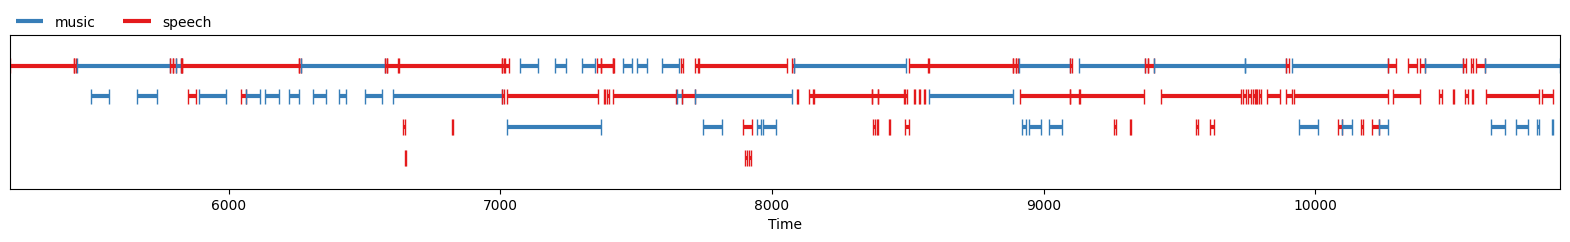

In [31]:
reference = Annotation()
reference = reference.from_txt(
    "/home/lennon/workspace/audio-seg-data-synth/Cortes_music_nmusic/139850/139850_corte_m_nm.txt",
    map_labels = lambda x: "music" if x in ["singing", "instrumental"] else "speech"
)
reference

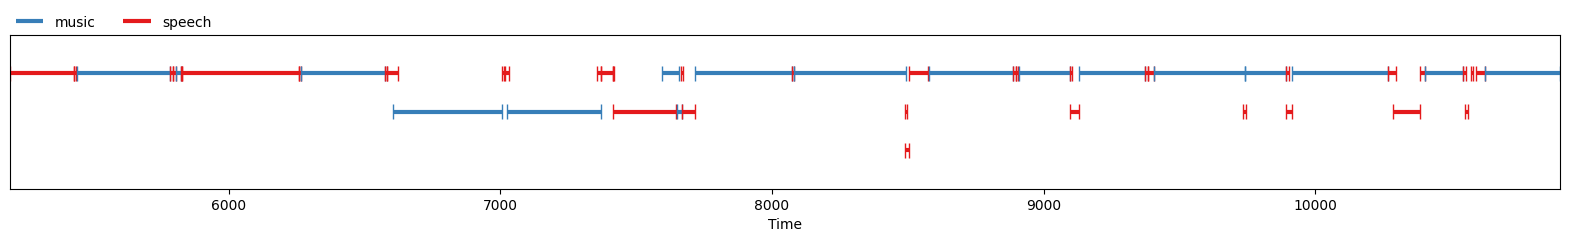

In [32]:
reference = reference.segmentation()
reference

In [33]:
start = reference.get_timeline()[0].start
end = reference.get_timeline()[-1].end

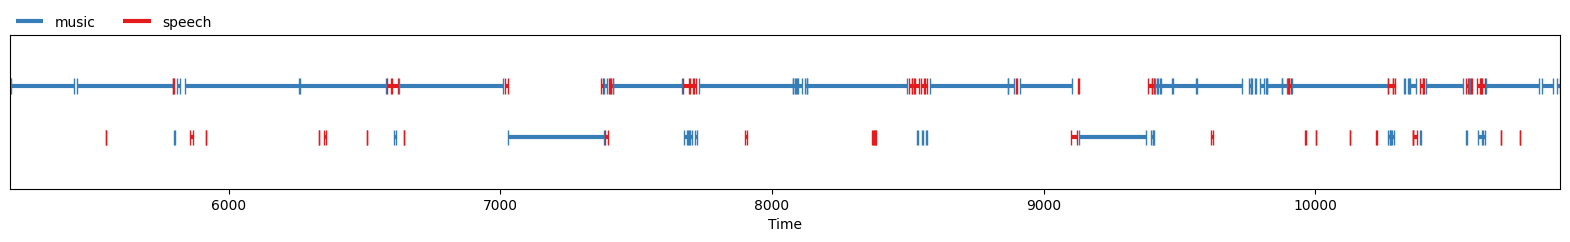

In [34]:
hypothesis = Annotation()
hypothesis = hypothesis.from_txt(
    "/home/lennon/workspace/audio-seg-data-synth/Cortes_music_nmusic/139850/139850-local.txt",
    start=start,
    end=end
)
hypothesis

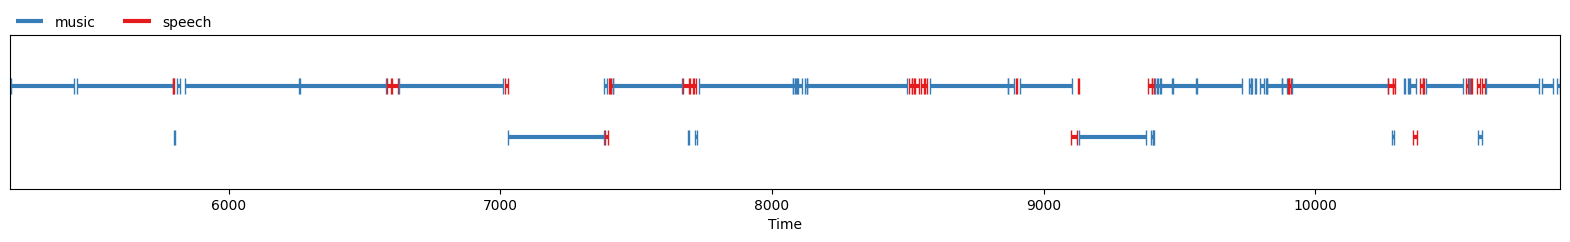

In [35]:
hypothesis = hypothesis.segmentation()
hypothesis

In [36]:
error_analysis = compute_metrics(marks_dict=None, Ref=reference, 
                Hyp=hypothesis, withcontext=False, tolerance= 0.0, 
                validLabels=["music"], endfile=None)
error_analysis

{'counts': {'missed detection': 16,
  'false alarm': 13,
  'correct tp': 73,
  'correct dap': 38,
  'total': 54,
  'total hyp': 79,
  'confusion': 14,
  'total musics audit': 54},
 'dap': 0.7037037037037037,
 'errors': {'pyannote': 'Annotation',
  'content': [{'segment': {'start': 5195.0, 'end': 5195.64172},
    'track': 'correct dap0',
    'label': ('correct dap', 'speech', 'speech')},
   {'segment': {'start': 5195.0, 'end': 5195.64172},
    'track': 'correct tp0',
    'label': ('correct tp', 'speech', 'speech')},
   {'segment': {'start': 5197.25805, 'end': 5430.05896},
    'track': 'confusion0',
    'label': ('confusion', '-', 'music')},
   {'segment': {'start': 5197.25805, 'end': 5430.05896},
    'track': 'false alarm0',
    'label': ('false alarm', '-', 'music')},
   {'segment': {'start': 5430.488347, 'end': 5438.267559},
    'track': 'missed detection0',
    'label': ('missed detection', 'speech', '-')},
   {'segment': {'start': 5440.2458, 'end': 5794.54059},
    'track': 'correct

In [37]:
import pkg_resources

installed_packages = pkg_resources.working_set
installed_packages_list = sorted(["%s==%s" % (i.key, i.version) for i in installed_packages])

for package in installed_packages_list:
    print(package)

absl-py==2.1.0
aiohttp==3.9.5
aiosignal==1.3.1
asttokens==2.4.1
astunparse==1.6.3
async-timeout==4.0.3
attrs==23.2.0
audioread==3.0.1
brotli==1.1.0
certifi==2024.2.2
cffi==1.16.0
charset-normalizer==3.3.2
click==8.1.7
comm==0.2.2
contourpy==1.2.1
cuda-python==12.4.0
cycler==0.12.1
debugpy==1.6.7
decorator==5.1.1
docopt==0.6.2
exceptiongroup==1.2.0
executing==2.0.1
flatbuffers==24.3.25
fonttools==4.51.0
frozenlist==1.4.1
gast==0.5.4
gevent==24.2.1
geventhttpclient==2.0.2
google-pasta==0.2.0
greenlet==3.0.3
grpcio==1.62.2
h5py==3.11.0
hermes==0.1
idna==3.7
importlib-metadata==7.1.0
importlib-resources==6.4.0
ipykernel==6.29.3
ipython==8.18.1
jedi==0.19.1
joblib==1.4.0
jupyter-client==8.6.1
jupyter-core==5.7.2
keras==3.3.2
kiwisolver==1.4.5
lazy-loader==0.4
libclang==18.1.1
libmetrics==0.0.1
librosa==0.10.1
llvmlite==0.42.0
markdown-it-py==3.0.0
markdown==3.6
markupsafe==2.1.5
matplotlib-inline==0.1.6
matplotlib==3.8.4
mdurl==0.1.2
ml-dtypes==0.3.2
mpmath==1.3.0
msgpack==1.0.8
multidict==